## Тестовое задание - Надир Альпеисов

### 1. Объединение всех магазинов в один файл

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce


def load_dataset1():
    
    df = pd.read_excel(r"C:\OneDrive\Desktop\Nadir\Power BI\karkop\sales_in_karkop\notepad\sales_shop_10.xls")
    
    return df

df1 = load_dataset1()
df1['Магазин'] = 'Магазин №10 Харьков'

def load_dataset2():
    
    df = pd.read_excel(r"C:\OneDrive\Desktop\Nadir\Power BI\karkop\sales_in_karkop\notepad\sales_shop_11.xls")
    
    return df

df2 = load_dataset2()
df2['Магазин'] = 'Магазин №11 Харьков'

def load_dataset3():
    
    df = pd.read_excel(r"C:\OneDrive\Desktop\Nadir\Power BI\karkop\sales_in_karkop\notepad\sales_shop_12.xls")
    
    return df

df3 = load_dataset3()
df3['Магазин'] = 'Магазин №12 Харьков'

result = pd.concat([df1, df2, df3], ignore_index=True)
result = result[['№ чека', 'Дата продажи', 'Товар ID', 'Кол-во', 'Сумма', 'Покупатель', 'Магазин', 'Себестоимость закупки', 'Дата отгрузки']]
result = result.rename(columns={"Сумма": "Сумма всего"})


def load_dataset4():
    
    df = pd.read_excel(r"C:\OneDrive\Desktop\Nadir\Power BI\karkop\Бюджетный файл (продажи только по магазинам 1-9).xlsx", sheet_name = 'рПродажиФакт')
    
    return df

other_cities = load_dataset4()

other_cities = other_cities[['№ чека', 'Дата продажи', 'Товар ID новый', 'Кол-во', 'Сумма всего', 'Покупатель', 'Магазин', 'Себестоимость закупки', 'Дата отгрузки']]

def load_dataset5():
    
    df = pd.read_excel(r"C:\OneDrive\Desktop\Nadir\Power BI\karkop\Бюджетный файл (продажи только по магазинам 1-9).xlsx", sheet_name = 'спрТовары')
    
    return df

new_id = load_dataset5()

dict_df = new_id.set_index('ID старый (по Харькову)')['ID новый'].to_dict()
result["Товар ID"] = result["Товар ID"].apply(lambda x: dict_df.get(x))
result = result.rename(columns={"Товар ID": "Товар ID новый"})


df_out = pd.concat([other_cities, result], ignore_index=True)

### 2. Динамика продаж по брендам

In [7]:
new_id['Бренд'] = new_id['Наименование товара'].str.split(', ', n=1).str.get(-1)
dict_df2 = new_id.set_index('ID новый')['Бренд'].to_dict()
df_out["Бренд"] = df_out["Товар ID новый"].apply(lambda x: dict_df2.get(x))

#### а. Продажи по брендам по годам

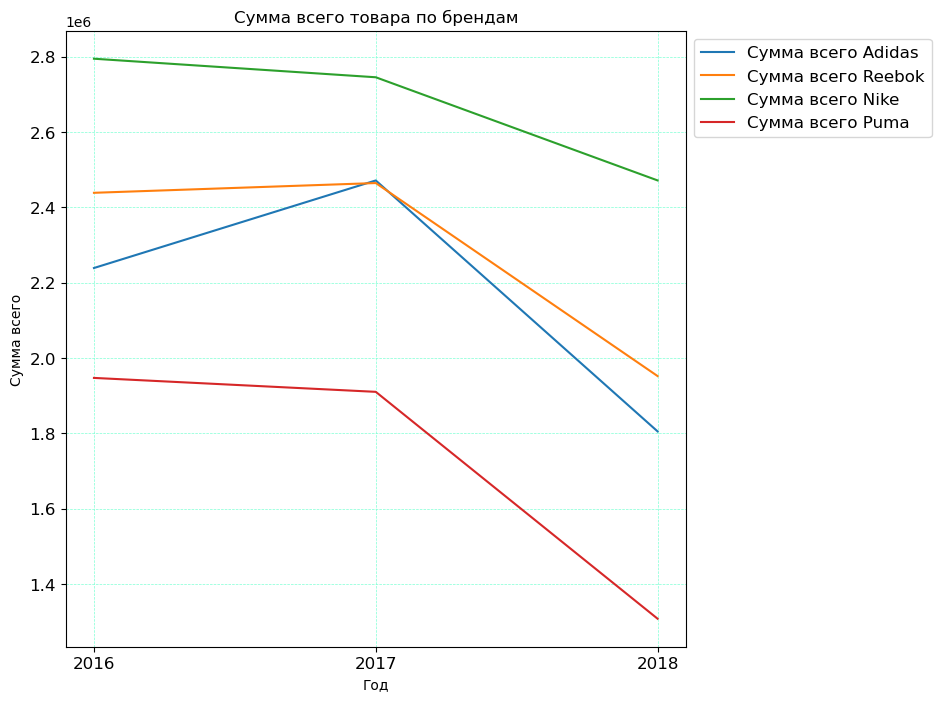

,Дата продажи,Сумма всего Adidas,Сумма всего Reebok,Сумма всего Nike,Сумма всего Puma
0,2016,2.238721e+06,2.438399e+06,2.794364e+06,1.946954e+06
1,2017,2.471187e+06,2.464284e+06,2.745120e+06,1.909959e+06
2,2018,1.804935e+06,1.951853e+06,2.471244e+06,1.307614e+06


In [726]:
def brand_annual_sales_revenue_items(df, parameter):
    
    brands = df['Бренд'].tolist()
    brands = list(dict.fromkeys(brands))
    df_lst = []
    
    for i in brands:
        df_brand = df[(df['Бренд'] == i)]
        brand_by_year = df_brand.groupby(df_brand['Дата продажи'].dt.year)[parameter].sum().dropna()
        brand_by_year = brand_by_year.to_frame().reset_index()
        brand_by_year.rename(columns = {f'{parameter}': f'{parameter} {i}'}, inplace = True)
        
        df_lst.append(brand_by_year)
        
    df_out1 = pd.merge(df_lst[0], df_lst[1], on = 'Дата продажи')
    df_out2 = pd.merge(df_out1, df_lst[2], on = 'Дата продажи')
    df_tot = pd.merge(df_out2, df_lst[3], on = 'Дата продажи')
    
    col_one_list = df_tot['Дата продажи'].tolist()
    
    df_tot.plot.line(figsize = (8, 8), fontsize = 12, x = 'Дата продажи', xticks = col_one_list)
    plt.title(f'{parameter} товара по брендам')
    plt.xlabel('Год')
    plt.ylabel(f'{parameter}')
    plt.grid(color = 'aquamarine', linestyle = '--', linewidth = 0.5)
    plt.legend(fontsize=12, bbox_to_anchor = (1.0, 1.0))

    
    plt.show()
    
    
    return df_tot

# 2 параметра:
# Сумма всего - Выручка по брендам
# Кол-во - Количество проданных единиц товара

a = brand_annual_sales_revenue_items(df_out, 'Сумма всего')
a 

#### б. Продажи по брендам по месяцам определенного года - 2016, 2017, 2018

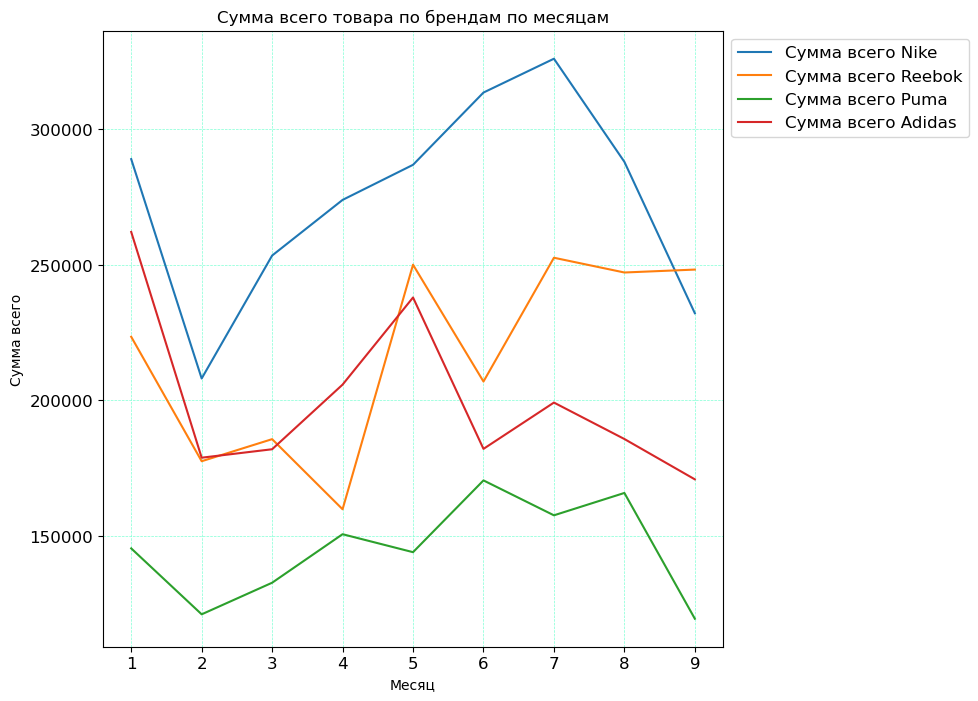

,Дата продажи,Сумма всего Nike,Сумма всего Reebok,Сумма всего Puma,Сумма всего Adidas
0,1,289013.490838,223491.690257,145441.587010,262157.238578
1,2,208107.965015,177592.766587,121126.415662,178891.408347
2,3,253446.673826,185729.855051,132777.981834,182007.150211
3,4,273969.215394,159872.772788,150674.030387,205843.028255
4,5,286912.928270,250070.361432,144044.620677,237977.456946
5,6,313565.312699,206984.836010,170517.850815,182144.886203
6,7,326042.350216,252639.154630,157639.933312,199224.088940
7,8,288009.517086,247198.417112,165889.033308,185783.444734
8,9,232176.783499,248272.867311,119502.055601,170906.136247


In [727]:
def sales_items_by_month(df, parameter, year):
    
    start_date = year + '-01-01'
    end_date = year + '-12-31'
    
    df = df.loc[(df['Дата продажи'] >= start_date)
                     & (df['Дата продажи'] < end_date)]
    
    brands = df['Бренд'].tolist()
    brands = list(dict.fromkeys(brands))
    df_lst = []
    
    for i in brands:
        df_brand = df[(df['Бренд'] == i)]
        brand_by_year = df_brand.groupby(df_brand['Дата продажи'].dt.month)[parameter].sum()
        brand_by_year = brand_by_year.to_frame().reset_index()
        brand_by_year.rename(columns = {f'{parameter}': f'{parameter} {i}'}, inplace = True)
        
        df_lst.append(brand_by_year)
        
    df_out1 = pd.merge(df_lst[0], df_lst[1], on = 'Дата продажи')
    df_out2 = pd.merge(df_out1, df_lst[2], on = 'Дата продажи')
    df_tot = pd.merge(df_out2, df_lst[3], on = 'Дата продажи')
    
    months = ['янв.', 'февр.', 'март', 'апр.', 'май', 'июнь', 'июль', 'авг.',
         'сент.', 'окт.', 'нояб.', 'дек.']
    
    df_tot.plot.line(figsize = (8, 8), fontsize = 12, x = 'Дата продажи')
    plt.title(f'{parameter} товара по брендам по месяцам')
    plt.xlabel('Месяц')
    plt.ylabel(f'{parameter}')
    plt.grid(color = 'aquamarine', linestyle = '--', linewidth = 0.5)
    plt.legend(fontsize=12, bbox_to_anchor = (1.0, 1.0))
    
    plt.show()
    
    
    return df_tot

# 2 параметра:
# Сумма всего - Выручка по брендам
# кол-во - Количество проданных единиц товара

b = sales_items_by_month(df_out, 'Сумма всего', '2018')
b 
    

### 3. План факт операционных расходов

In [8]:
def load_dataset6():
    
    df = pd.read_excel(r"C:\OneDrive\Desktop\Nadir\Power BI\karkop\Бюджетный файл (продажи только по магазинам 1-9).xlsx", sheet_name = 'рОпер.расходы')
    
    return df

costs = load_dataset6()

#### а. План факт операционных расходов по всем магазинам по статьям расходов по годам

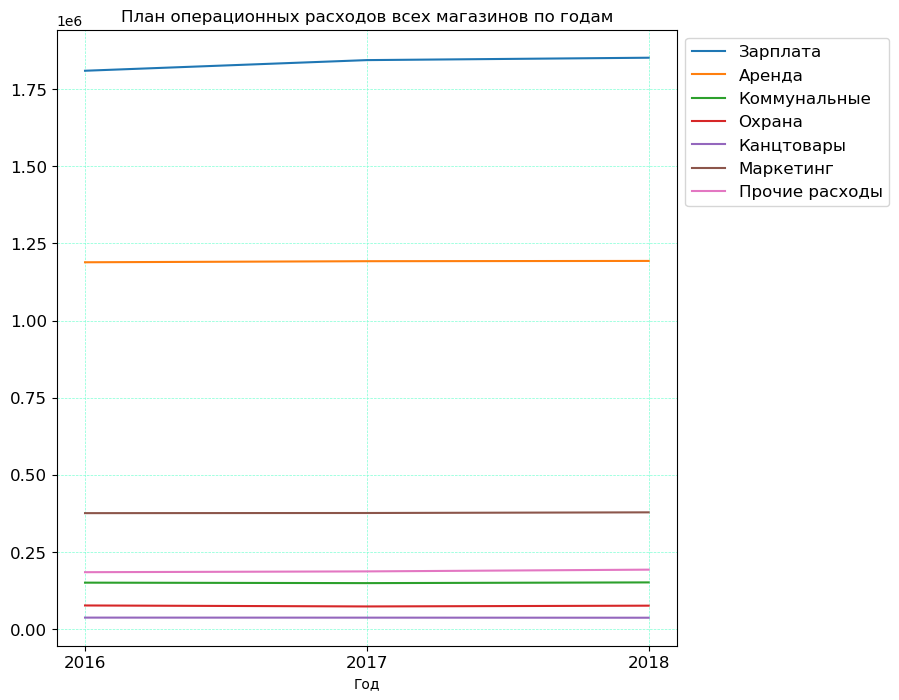

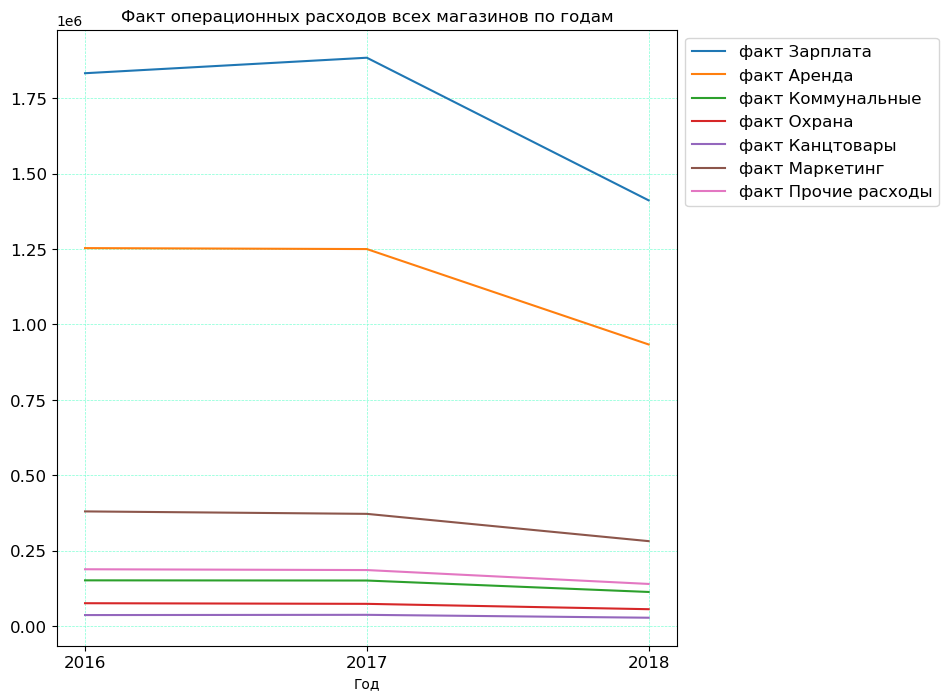

,Дата,факт Зарплата,факт Аренда,факт Коммунальные,факт Охрана,факт Канцтовары,факт Маркетинг,факт Прочие расходы
0,2016,1.833010e+06,1.253246e+06,151795.744735,75992.939800,36709.380353,380349.788826,188556.251677
1,2017,1.884397e+06,1.250066e+06,151193.676487,73899.559331,37479.377466,372228.860815,185926.708059
2,2018,1.411506e+06,9.337792e+05,113288.020048,56143.052832,27899.691397,281769.580462,139875.764105


In [729]:
def costs_by_year_by_all_shops(df):
    shops = df['Магазин'].tolist()
    shops = list(dict.fromkeys(shops))
    df_lst = []
    df_lst2 = []
     
    plan = df[(df['План или факт'] == 'план')]
    fact = df[(df['План или факт'] == 'факт')]
    
    plan_costs_lst = plan['Статья затрат'].tolist()
    plan_costs_lst = list(dict.fromkeys(plan_costs_lst))
    
    fact_costs_lst = fact['Статья затрат'].tolist()
    fact_costs_lst = list(dict.fromkeys(plan_costs_lst))
    
    for i in plan_costs_lst:
        
        plan_cost = plan[(plan['Статья затрат'] == i)]        
        costs_by_year = plan_cost.groupby(plan_cost['Дата'].dt.year)['Сумма'].sum()
        costs_by_year = costs_by_year.to_frame().reset_index()
        costs_by_year.rename(columns = {'Сумма': f'{i}'}, inplace = True)
        df_lst.append(costs_by_year)
    
    
    df_out1 = pd.merge(df_lst[0], df_lst[1], on = 'Дата')
    df_out2 = pd.merge(df_out1, df_lst[2], on = 'Дата')
    df_out3 = pd.merge(df_out2, df_lst[3], on = 'Дата')
    
    df_out4 = pd.merge(df_out3, df_lst[4], on = 'Дата')
    df_out5 = pd.merge(df_out4, df_lst[5], on = 'Дата')
    df_tot_plan = pd.merge(df_out5, df_lst[6], on = 'Дата')
    
    col_one_list = df_tot_plan['Дата'].tolist()
    
    
    df_tot_plan.plot.line(figsize = (8, 8), fontsize = 12, x = 'Дата' , xticks = col_one_list)
    plt.title('План операционных расходов всех магазинов по годам')
    plt.xlabel('Год')
    plt.grid(color = 'aquamarine', linestyle = '--', linewidth = 0.5)
    plt.legend(fontsize=12, bbox_to_anchor = (1.0, 1.0))

    
    plt.show()
    

    for i in fact_costs_lst:
        
        fact_cost = fact[(fact['Статья затрат'] == i)]        
        costs_by_year = fact_cost.groupby(fact_cost['Дата'].dt.year)['Сумма'].sum()
        costs_by_year = costs_by_year.to_frame().reset_index()
        costs_by_year.rename(columns = {'Сумма': f'факт {i}'}, inplace = True)
        df_lst2.append(costs_by_year)
    
    
    df_out1 = pd.merge(df_lst2[0], df_lst2[1], on = 'Дата')
    df_out2 = pd.merge(df_out1, df_lst2[2], on = 'Дата')
    df_out3 = pd.merge(df_out2, df_lst2[3], on = 'Дата')
    
    df_out4 = pd.merge(df_out3, df_lst2[4], on = 'Дата')
    df_out5 = pd.merge(df_out4, df_lst2[5], on = 'Дата')
    df_tot_fact = pd.merge(df_out5, df_lst2[6], on = 'Дата')
    
    col_one_list = df_tot_fact['Дата'].tolist()
    
    df_tot_fact.plot.line(figsize = (8, 8), fontsize = 12, x = 'Дата' , xticks = col_one_list)
    plt.title('Факт операционных расходов всех магазинов по годам')
    plt.xlabel('Год')
#     plt.ylabel(f'{parameter}')
    plt.grid(color = 'aquamarine', linestyle = '--', linewidth = 0.5)
    plt.legend(fontsize=12, bbox_to_anchor = (1.0, 1.0))

    plt.show()

    return df_tot_fact



c = costs_by_year_by_all_shops(costs)
c 

#### б. План факт операционных расходов по статьям расходов в определенный год

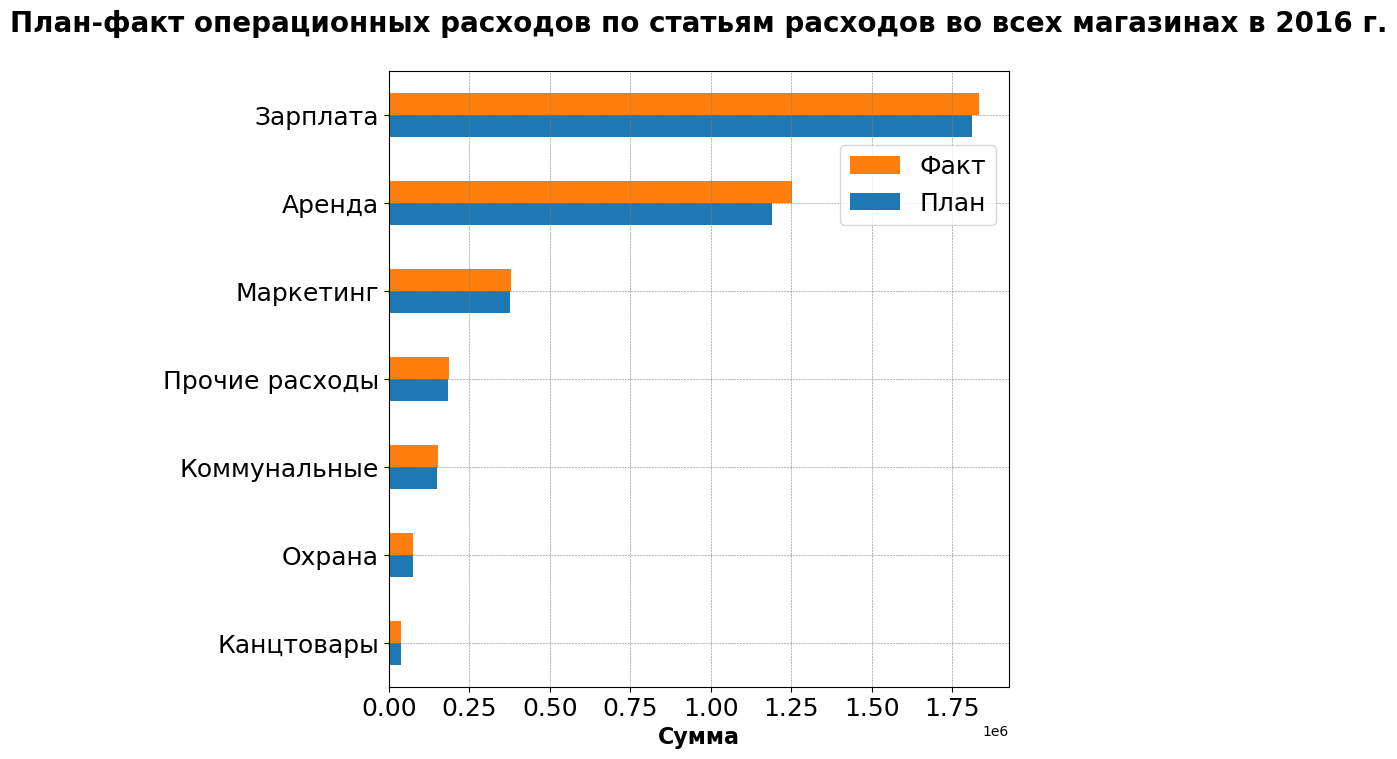

,Статья затрат,План,Факт
0,Аренда,1.189128e+06,1.253246e+06
1,Зарплата,1.809949e+06,1.833010e+06
2,Канцтовары,3.732246e+04,3.670938e+04
3,Коммунальные,1.506269e+05,1.517957e+05
4,Маркетинг,3.759548e+05,3.803498e+05
5,Охрана,7.668526e+04,7.599294e+04
6,Прочие расходы,1.845483e+05,1.885563e+05


In [10]:
def costs_by_year_by_all_shops_plan_fact(df, year):
    shops = df['Магазин'].tolist()
    shops = list(dict.fromkeys(shops))
    df_lst = []
    
    start_date = year + '-01-01'
    end_date = year + '-12-31'
    
    df = df.loc[(df['Дата'] >= start_date)
                     & (df['Дата'] < end_date)]
    
    plan = df[(df['План или факт'] == 'план')]
    fact = df[(df['План или факт'] == 'факт')]
    
    plan1 = plan.groupby(['Статья затрат'])['Сумма'].sum().dropna()
    plan1 = plan1.to_frame().reset_index()
    plan1.rename(columns = {'Сумма':'План'}, inplace = True)
    
    fact1 = fact.groupby(['Статья затрат'])['Сумма'].sum().dropna()
    fact1 = fact1.to_frame().reset_index()
    fact1.rename(columns = {'Сумма':'Факт'}, inplace = True)
    
    df_out1 = pd.merge(plan1, fact1, on = 'Статья затрат')
    
    
    sort_df_out1 = df_out1.sort_values(by='Факт')
    ax = sort_df_out1.plot(kind="barh", figsize = (8, 8), fontsize = 18, x = 'Статья затрат')
    handles, labels = ax.get_legend_handles_labels()
    plt.title(f'План-факт операционных расходов по статьям расходов во всех магазинах в {year} г.', fontsize = 20, weight = 'bold', y = 1.05)
    
    plt.xlabel('Сумма', weight = 'bold', fontsize = 16)
    plt.ylabel('', weight = 'bold', fontsize = 12)
    plt.legend(handles[::-1], labels[::-1],fontsize=18, bbox_to_anchor = (1.0, 0.9))
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.4)
    plt.show()
    
    return df_out1
    

c1 = costs_by_year_by_all_shops_plan_fact(costs, '2016')
c1 

#### в. План факт операционных расходов по магазинам в определенный год

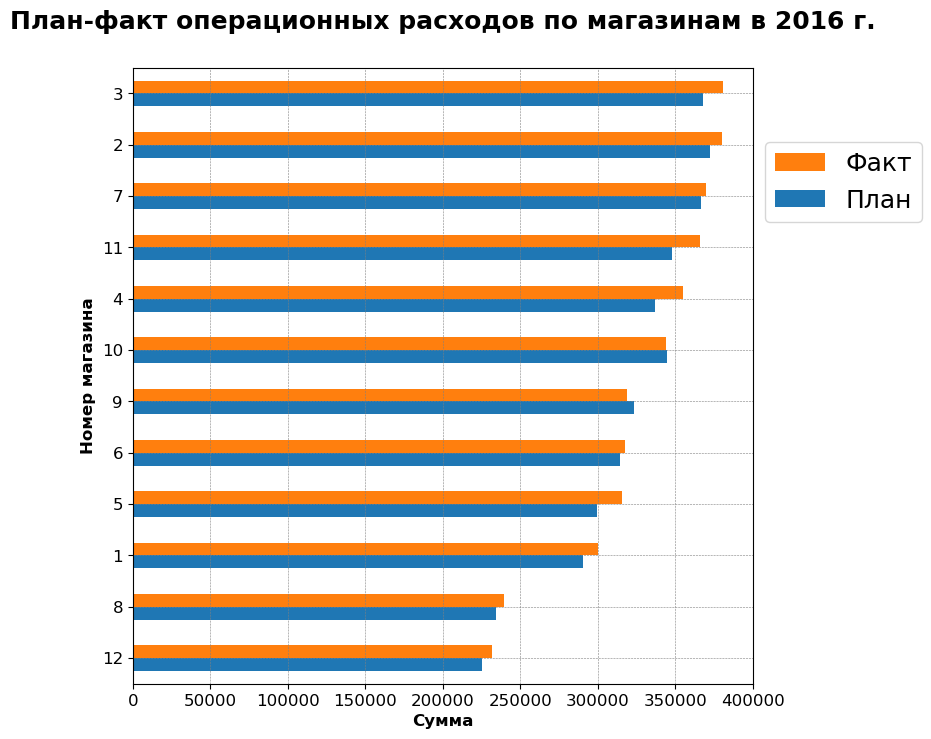

,Магазин,План,Факт
0,1,290448.430364,300045.879038
1,2,372480.407009,380490.523455
2,3,367700.376676,381043.463664
3,4,337095.984246,354836.988425
4,5,299659.392068,315624.067882
5,6,314102.214661,317923.825792
6,7,366775.140920,370137.313588
7,8,234589.992870,239378.874342
8,9,323229.898500,318859.235739
9,10,345039.821220,344144.391813


In [11]:
def plan_fact_costs_by_shops_by_year(df, year):
    
    start_date = year + '-01-01'
    end_date = year + '-12-31'
    
    df = df.loc[(df['Дата'] >= start_date)
                     & (df['Дата'] < end_date)]
    
    plan = df[(df['План или факт'] == 'план')]
    fact = df[(df['План или факт'] == 'факт')]
    
    plan1 = plan.groupby(['Магазин'])['Сумма'].sum().dropna()
    plan1 = plan1.to_frame().reset_index()
    plan1.rename(columns = {'Сумма':'План'}, inplace = True)
    
    fact1 = fact.groupby(['Магазин'])['Сумма'].sum().dropna()
    fact1 = fact1.to_frame().reset_index()
    fact1.rename(columns = {'Сумма':'Факт'}, inplace = True)
    
    df_out1 = pd.merge(plan1, fact1, on = 'Магазин')
    
    sort_df_out1 = df_out1.sort_values(by='Факт')
    ax = sort_df_out1.plot(kind="barh", figsize = (8, 8), fontsize = 12, x = 'Магазин')
    handles, labels = ax.get_legend_handles_labels()
    plt.title(f'План-факт операционных расходов по магазинам в {year} г.', fontsize = 18, weight = 'bold', y = 1.05)
    
    plt.xlabel('Сумма', weight = 'bold', fontsize = 12)
    plt.ylabel('Номер магазина', weight = 'bold', fontsize = 12)
    plt.legend(handles[::-1], labels[::-1],fontsize=18, bbox_to_anchor = (1.0, 0.9))
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.4)
    plt.show()
    
    return df_out1
    
d = plan_fact_costs_by_shops_by_year(costs, '2016')
d  

#### г. План факт операционных расходов конкретного магазина по статьям расходов в определенный год

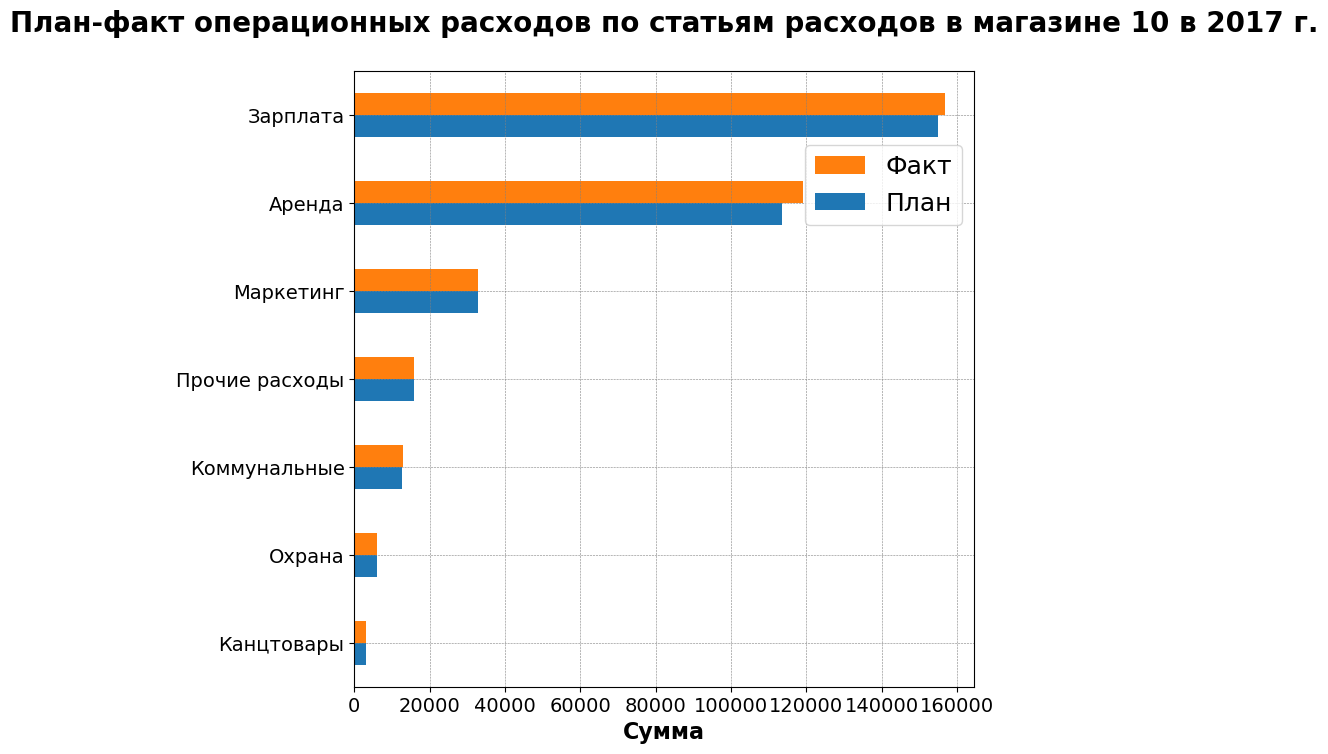

,Статья затрат,План,Факт
0,Аренда,113478.857143,118984.821429
1,Зарплата,154823.994835,156716.093037
2,Канцтовары,3046.951291,3082.544041
3,Коммунальные,12602.168826,12820.770391
4,Маркетинг,32774.896298,32776.667450
5,Охрана,6046.604938,6055.661493
6,Прочие расходы,15831.681458,15881.409379


In [732]:
def plan_fact_costs_of_the_shop(df, year, shop):

    shops = df['Магазин'].tolist()
    shops = list(dict.fromkeys(shops))
    df_lst = []
    
    start_date = year + '-01-01'
    end_date = year + '-12-31'
    
    df = df.loc[(df['Дата'] >= start_date)
                     & (df['Дата'] < end_date) & (df['Магазин'] == shop)]
    
    plan = df[(df['План или факт'] == 'план')]
    fact = df[(df['План или факт'] == 'факт')]
    
    plan1 = plan.groupby(['Статья затрат'])['Сумма'].sum().dropna()
    plan1 = plan1.to_frame().reset_index()
    plan1.rename(columns = {'Сумма':'План'}, inplace = True)
    
    fact1 = fact.groupby(['Статья затрат'])['Сумма'].sum().dropna()
    fact1 = fact1.to_frame().reset_index()
    fact1.rename(columns = {'Сумма':'Факт'}, inplace = True)
    
    df_out1 = pd.merge(plan1, fact1, on = 'Статья затрат')
    
    
    sort_df_out1 = df_out1.sort_values(by='Факт')
    ax = sort_df_out1.plot(kind="barh", figsize = (8, 8), fontsize = 14, x = 'Статья затрат')
    handles, labels = ax.get_legend_handles_labels()
    plt.title(f'План-факт операционных расходов по статьям расходов в магазине {shop} в {year} г.', fontsize = 20, weight = 'bold', y = 1.05)
    
    plt.xlabel('Сумма', weight = 'bold', fontsize = 16)
    plt.ylabel('', weight = 'bold', fontsize = 12)
    plt.legend(handles[::-1], labels[::-1],fontsize=18, bbox_to_anchor = (1.0, 0.9))
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.4)
    plt.show()
    
    return df_out1
    

c3 = plan_fact_costs_of_the_shop(costs, '2017', 10)
c3 

### 4. Прибыль

In [29]:
df_out['Прибыль'] = df_out['Сумма всего'] - df_out['Себестоимость закупки']

In [30]:
def load_dataset7():
    
    df = pd.read_excel(r"C:\OneDrive\Desktop\Nadir\Power BI\karkop\План продаж и себестоимости.xlsx", sheet_name = 'ПланСебестоимость')
    
    return df

plan_costs = load_dataset7()

In [31]:
plan_costs = plan_costs.transpose()
plan_costs.columns = plan_costs.iloc[0]
plan_costs = plan_costs[1:]
plan_costs = plan_costs.reset_index()
plan_costs.rename(columns={plan_costs.columns[0]: 'Дата'},inplace=True)

In [32]:
def load_dataset8():
    
    df = pd.read_excel(r"C:\OneDrive\Desktop\Nadir\Power BI\karkop\План продаж и себестоимости.xlsx", sheet_name = 'ПланПродажи')
    
    return df

plan_sales = load_dataset8()

In [33]:
plan_sales = plan_sales.transpose()
plan_sales.columns = plan_sales.iloc[0]
plan_sales = plan_sales[1:]
plan_sales = plan_sales.reset_index()
plan_sales.rename(columns={plan_sales.columns[0]: 'Дата'},inplace=True)
plan_sales = plan_sales.iloc[3:]

#### а. План факт прибыли по всем магазинам

In [34]:
def plan_profit_by_shops(df1, df2, df3):
    
    good_cost = df1.set_index('Дата').subtract(df2.set_index('Дата'))
    plan_costs = df3[(df3['План или факт'] == 'план')]
    pd_lst = []
    
    for i in range(1, 13):
        shop = plan_costs[(plan_costs['Магазин'] == i)]
        shop1 = shop.groupby(shop['Дата'])['Сумма'].sum()
        shop1 = shop1.to_frame().reset_index()
        shop1.rename(columns = {'Сумма': f'Магазин №{i}'}, inplace = True)
        pd_lst.append(shop1)
    
    data_merge_costs = reduce(lambda left, right:
                       pd.merge(left, right,
                               on = ['Дата'],
                               how = 'outer'),
                       pd_lst)
    
    good_cost = good_cost.reset_index()
    profit = good_cost.set_index('Дата').subtract(data_merge_costs.set_index('Дата'))

    
    return profit
    
plan_profit = plan_profit_by_shops(plan_sales, plan_costs, costs)

In [36]:
def shop_profit_by_month_fact(df1, df2):
    
    pd_lst2 = []
    stop = ['Магазин №', ' Киев', ' Харьков', ' Днепр']
    for i in stop:
        df2['Магазин'] = df2['Магазин'].str.replace(i, '')
    
    shops = df2['Магазин'].tolist()
    shops = list(dict.fromkeys(shops))
    
    
    for i in ['2016', '2017', '2018']:
        start_date = i + '-01-01'
        end_date = i + '-12-31'

        df2 = df2.loc[(df2['Дата продажи'] >= start_date)
                         & (df2['Дата продажи'] < end_date)]
    
        for i in shops:
            shop2 = df2[(df2['Магазин'] == i)]

            shop2 = shop2.groupby(shop2['Дата продажи'].dt.month)['Прибыль'].sum()
    #         shop2 = shop2.groupby(shop2['Дата продажи'])['Прибыль'].sum()
            shop2 = shop2.to_frame().reset_index()
            shop2.rename(columns = {'Прибыль': f'Магазин №{i}'}, inplace = True)
            pd_lst2.append(shop2)
    
    profit2 = reduce(lambda left, right:
                    pd.merge(left, right,
                            on = ['Дата продажи'],
                            how = 'outer'),
                    pd_lst2)
    
    fact_costs = df1[(df1['План или факт'] == 'факт')]
    pd_lst = []
    
    for i in range(1, 13):
        shop = fact_costs[(fact_costs['Магазин'] == i)]
        shop1 = shop.groupby(shop['Дата'])['Сумма'].sum()
        shop1 = shop1.to_frame().reset_index()
        shop1.rename(columns = {'Сумма': f'Магазин №{i}'}, inplace = True)
        pd_lst.append(shop1)
    
    data_merge_costs = reduce(lambda left, right:
                       pd.merge(left, right,
                               on = ['Дата'],
                               how = 'outer'),
                       pd_lst)
    
    
    data_merge_costs = data_merge_costs.iloc[:-3]
    
    
    return data_merge_costs
        
fact_costs_shops = shop_profit_by_month_fact(costs, df_out)

In [40]:
def shop_profit_by_month_fact2(df1, df2):

    pd_lst2 = []
    
    stop = ['Магазин №', ' Киев', ' Харьков', ' Днепр']
    for i in stop:
        df2['Магазин'] = df2['Магазин'].str.replace(i, '')
    
    df2['year'] = pd.DatetimeIndex(df2['Дата продажи']).year
    
    shops = df2['Магазин'].tolist()
    shops = list(dict.fromkeys(shops))
        
    year16 = df2[(df2['year'] == 2016)]
    year17 = df2[(df2['year'] == 2017)]
    year18 = df2[(df2['year'] == 2018)]
    
    
    for i in shops:
        shop_y_16 = year16[(year16['Магазин'] == i)]
        shop_y_16 = shop_y_16.groupby(shop_y_16['Дата продажи'].dt.month)['Прибыль'].sum()
        shop_y_16 = shop_y_16.to_frame().reset_index()
        shop_y_16.rename(columns = {'Прибыль': f'Магазин №{i}'}, inplace = True)
        
        shop_y_17 = year17[(year17['Магазин'] == i)]
        shop_y_17 = shop_y_17.groupby(shop_y_17['Дата продажи'].dt.month)['Прибыль'].sum()
        shop_y_17 = shop_y_17.to_frame().reset_index()
        shop_y_17.rename(columns = {'Прибыль': f'Магазин №{i}'}, inplace = True)
        
        shop_y_18 = year18[(year18['Магазин'] == i)]
        shop_y_18 = shop_y_18.groupby(shop_y_18['Дата продажи'].dt.month)['Прибыль'].sum()
        shop_y_18 = shop_y_18.to_frame().reset_index()
        shop_y_18.rename(columns = {'Прибыль': f'Магазин №{i}'}, inplace = True)
        
        result1 = pd.concat([shop_y_16, shop_y_17, shop_y_18], ignore_index=True)
        
        pd_lst2.append(result1)
    
    j = 1    
    while j < 12:
#         pd_lst[j] = 
        pd_lst2[j] = pd_lst2[j].drop(pd_lst2[j].columns[[0]],axis = 1)
        j += 1
        
#     pd_interim = pd.merge(pd_lst2[0], pd_lst2[1], on = 'Дата продажи')
    pd_interim = pd.concat([pd_lst2[0], pd_lst2[1], pd_lst2[2], pd_lst2[3], 
                            pd_lst2[4], pd_lst2[5], pd_lst2[6],pd_lst2[7],
                            pd_lst2[8], pd_lst2[9], pd_lst2[10], pd_lst2[11]], axis=1)
    
    pd_tot_profit = pd_interim.reindex(columns=['Дата продажи', 'Магазин №1', 'Магазин №2', 'Магазин №3', 
                                         'Магазин №4', 'Магазин №5', 'Магазин №6',
                                         'Магазин №7', 'Магазин №8', 'Магазин №9',
                                         'Магазин №10', 'Магазин №11', 'Магазин №12'])
    
    
    pd_tot_profit.rename(columns = {'Дата продажи':'Дата'}, inplace = True) 
    
    return pd_tot_profit
        
    
profit_by_shop = shop_profit_by_month_fact2(costs, df_out)

In [38]:
def net_profit_shops(profit, costs):
    
    profit['Дата'] = costs['Дата']
    
    net_profit = profit.set_index('Дата').subtract(costs.set_index('Дата'))
    
#     net_profit['sum'] = df['column1'] + df['column2']
    
    return net_profit
    
shops_net_profit = net_profit_shops(profit_by_shop , fact_costs_shops)

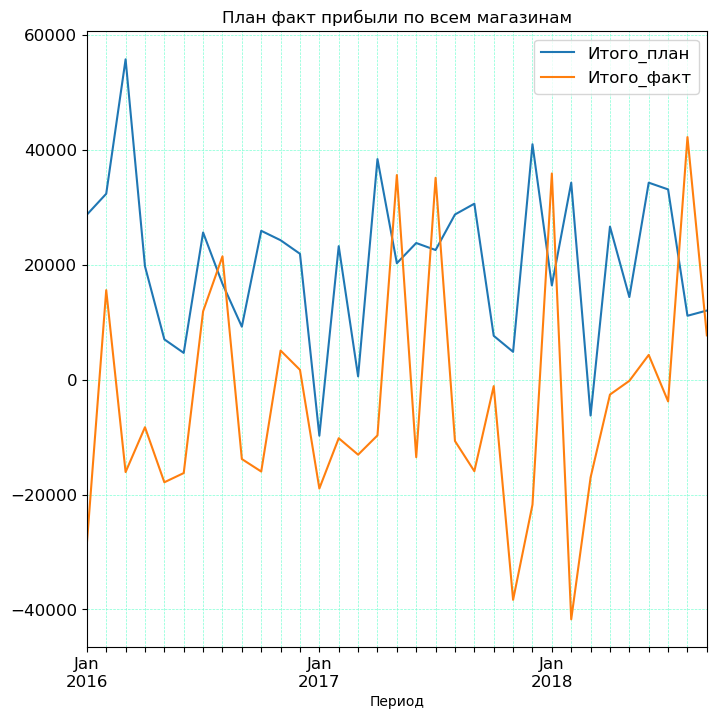

In [39]:
def plan_fact_profit1(plan, fact):
    
    # total
    plan['Итого_план'] = plan['Магазин №1'] + plan['Магазин №2'] + plan['Магазин №3'] + plan['Магазин №4'] 
    + plan['Магазин №5'] + plan['Магазин №6'] + plan['Магазин №7'] + plan['Магазин №8'] 
    + plan['Магазин №9'] + plan['Магазин №10'] + plan['Магазин №11'] + plan['Магазин №12']
    
    fact['Итого_факт'] = fact['Магазин №1'] + fact['Магазин №2'] + fact['Магазин №3'] + fact['Магазин №4'] 
    + fact['Магазин №5'] + fact['Магазин №6'] + fact['Магазин №7'] + fact['Магазин №8'] 
    + fact['Магазин №9'] + fact['Магазин №10'] + fact['Магазин №11'] + fact['Магазин №12']
    

    plan['Дата'] = plan.index
    fact['Дата'] = fact.index
    
    plan = plan.reindex(columns=['Дата', 'Магазин №1', 'Магазин №2', 'Магазин №3', 
                                         'Магазин №4', 'Магазин №5', 'Магазин №6',
                                         'Магазин №7', 'Магазин №8', 'Магазин №9',
                                         'Магазин №10', 'Магазин №11', 'Магазин №12', 'Итого_план'])
    
    fact = fact.reindex(columns=['Дата', 'Магазин №1', 'Магазин №2', 'Магазин №3', 
                                         'Магазин №4', 'Магазин №5', 'Магазин №6',
                                         'Магазин №7', 'Магазин №8', 'Магазин №9',
                                         'Магазин №10', 'Магазин №11', 'Магазин №12', 'Итого_факт'])

    plan_d = plan[['Дата', 'Итого_план']]
    fact_d = fact[['Дата', 'Итого_факт']]
    
#     plan_d = plan_d.droplevel(0, axis=1) 
#     fact_d = fact_d.droplevel(0, axis=1)
    
    plan_d = plan_d.reset_index(level=0, drop=True)
    fact_d = fact_d.reset_index(level=0, drop=True)
    
    df_tot = pd.merge(plan_d, fact_d, on = 'Дата')
    
    col_one_list = df_tot['Дата'].tolist()
    
    df_tot.plot.line(figsize = (8, 8), fontsize = 12, x = 'Дата' , xticks = col_one_list)
    plt.title('План факт прибыли по всем магазинам')
    plt.xlabel('Период')
#     plt.ylabel(f'{parameter}')
    plt.grid(color = 'aquamarine', linestyle = '--', linewidth = 0.5)
    plt.legend(fontsize=12, bbox_to_anchor = (1.0, 1.0))

    
    plt.show()
    
    
    return df_tot
    
    
    
plan_fact_profit = plan_fact_profit1(plan_profit, shops_net_profit)


#### б. План факт прибыли конкретного магазина

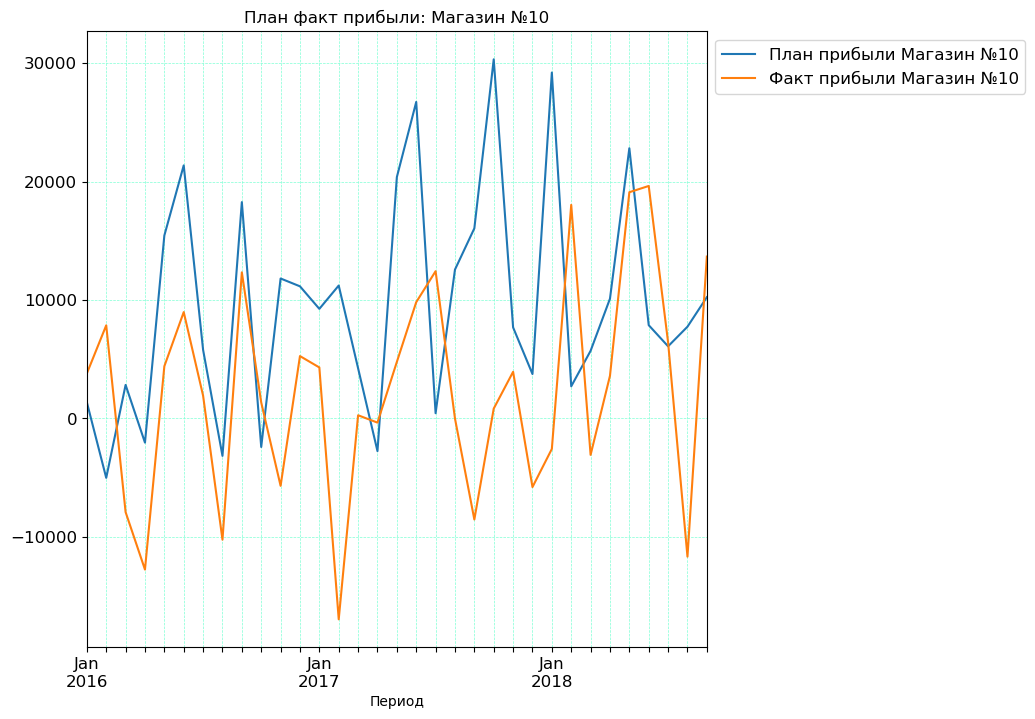

,Дата,План прибыли Магазин №10,Факт прибыли Магазин №10
0,2016-01-01,1360.859024,3789.428293
1,2016-02-01,-5025.103391,7856.094640
2,2016-03-01,2823.771139,-7918.093035
3,2016-04-01,-2050.459679,-12771.753979
4,2016-05-01,15443.370225,4401.146989
5,2016-06-01,21365.533543,8974.719730
6,2016-07-01,5784.452391,1915.387305
7,2016-08-01,-3168.634237,-10246.877298
8,2016-09-01,18261.668673,12329.891340
9,2016-10-01,-2417.169366,1341.083946


In [52]:
def plan_fact_profit_shop(plan, fact, shop):
    
    plan['Дата'] = plan.index
    fact['Дата'] = fact.index
    
    plan = plan.reindex(columns=['Дата', shop])
    
    fact = fact.reindex(columns=['Дата', shop])

    plan = plan.reset_index(level=0, drop=True)
    fact = fact.reset_index(level=0, drop=True)
    
    plan.rename(columns = {f'{shop}': f'План прибыли {shop}'}, inplace = True)
    fact.rename(columns = {f'{shop}': f'Факт прибыли {shop}'}, inplace = True)
    
    df_tot = pd.merge(plan, fact, on = 'Дата')
    
    col_one_list = df_tot['Дата'].tolist()
    
    df_tot.plot.line(figsize = (8, 8), fontsize = 12, x = 'Дата' , xticks = col_one_list)
    plt.title(f'План факт прибыли: {shop}')
    plt.xlabel('Период')
#     plt.ylabel(f'{parameter}')
    plt.grid(color = 'aquamarine', linestyle = '--', linewidth = 0.5)
    plt.legend(fontsize=12, bbox_to_anchor = (1.0, 1.0))

    
    plt.show()
    
    
    return df_tot
    

plan_fact_profit = plan_fact_profit_shop(plan_profit, shops_net_profit, 'Магазин №10')
plan_fact_profit 

### 5. Факт продаж, сравнение с аналогичным периодом прошлого года

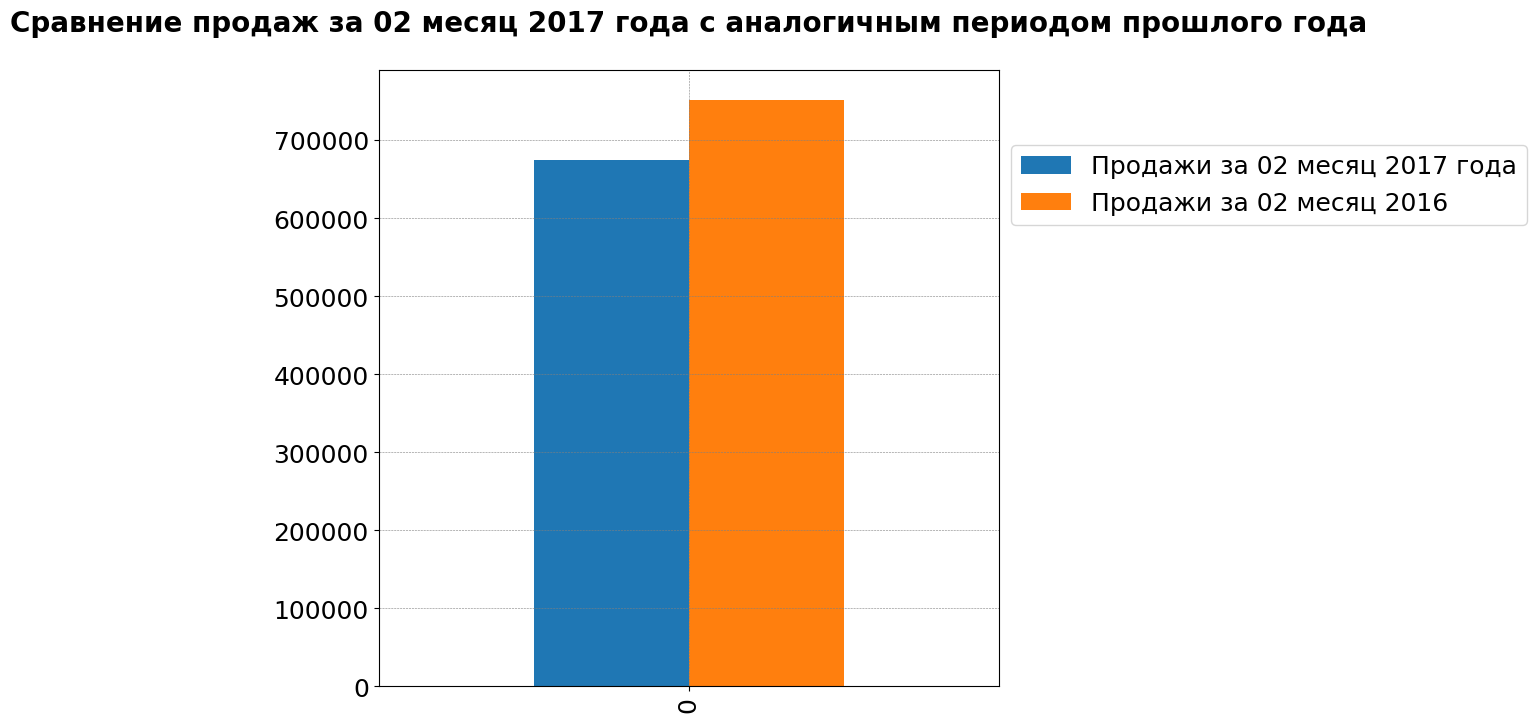

,Продажи за 02 месяц 2017 года,Продажи за 02 месяц 2016
0,675193.039859,751929.275562


In [48]:
def fact_sales_comparison(df, year, month):
    if year == '2018':
        previous_year = '2017'
    elif year == '2017':
        previous_year = '2016'
    else:
        previous_year = 0
        return 'choose between 2017 and 2018'
    
    days1 = ['01', '03', '05', '07', '08', '10', '12']
    days2 = ['04', '06', '09', '11']
    
    start_date = year + '-' + month + '-01'
    start_date2 = previous_year + '-' + month + '-01'
    
    
    if month in days1:
        end_date = year + '-' + month + '-31'
        end_date2 = previous_year + '-' + month + '-31'
    elif month in days2:
        end_date = year + '-' + month + '-30'
        end_date2 = previous_year + '-' + month + '-30'
    elif month == '02':
        end_date = year + '-' + month + '-28'
        end_date2 = previous_year + '-' + month + '-28'

        
    df1 = df.loc[(df['Дата продажи'] >= start_date) & (df['Дата продажи'] < end_date)]
    
    period = df1.groupby(df1['Дата продажи'].dt.month)['Сумма всего'].sum()
    period = period.to_frame().reset_index()
    period.rename(columns = {'Сумма всего': f'Продажи за {month} месяц {year} года'}, inplace = True)
    
    
    df2 = df.loc[(df['Дата продажи'] >= start_date2) & (df['Дата продажи'] < end_date2)]
    previous_period = df2.groupby(df2['Дата продажи'].dt.month)['Сумма всего'].sum()
    previous_period = previous_period.to_frame().reset_index()
    previous_period.rename(columns = {'Сумма всего': f'Продажи за {month} месяц {previous_year}'}, inplace = True)
    
    
    df_out = pd.merge(period, previous_period, on = 'Дата продажи')
    df_out = df_out[[f'Продажи за {month} месяц {year} года', f'Продажи за {month} месяц {previous_year}']]
    
#     sort_df_out1 = df_out.sort_values(by='Факт')
    ax = df_out.plot(kind="bar", figsize = (8, 8), fontsize = 18)
#     handles, labels = ax.get_legend_handles_labels()
    plt.title(f'Сравнение продаж за {month} месяц {year} года с аналогичным периодом прошлого года', fontsize = 20, weight = 'bold', y = 1.05)
    
    plt.xlabel('', weight = 'bold', fontsize = 16)
    plt.ylabel('', weight = 'bold', fontsize = 12)
    plt.legend(fontsize=18, bbox_to_anchor = (1.0, 0.9))
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.4)
    plt.show()
    
    return df_out
    
    
fact_sales = fact_sales_comparison(df_out, '2017', '02')
fact_sales
    

### 6. Динамика доли продаж магазина 7 (или любого другого магазина)

#### а. Динамика по годам

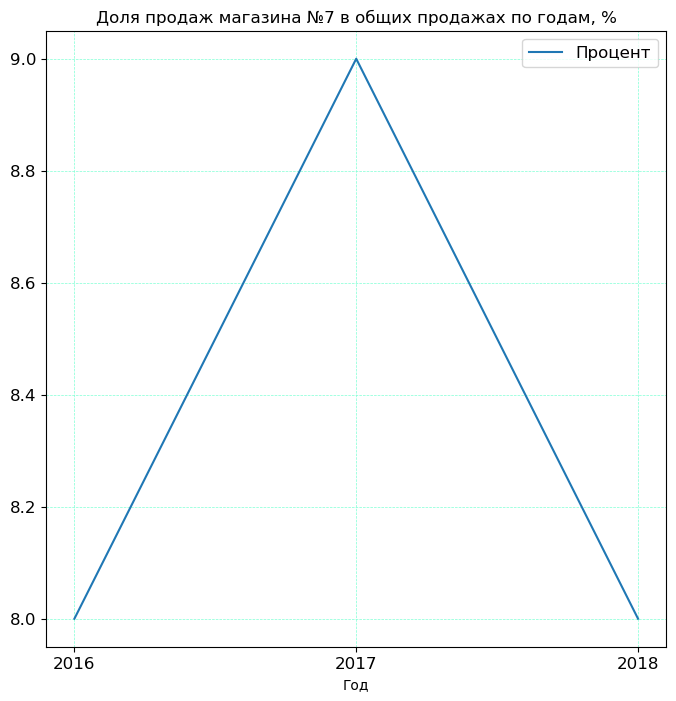

,Дата продажи,Процент
0,2016,8.0
1,2017,9.0
2,2018,8.0


In [49]:
def sales_seventh_shop_share_by_year(df, shop_number):
    
    shop = df[(df['Магазин'] == shop_number)]
    
    shop_sales_by_year = shop.groupby(shop['Дата продажи'].dt.year)['Сумма всего'].sum().dropna()
    shop_sales_by_year = shop_sales_by_year.to_frame().reset_index()
    shop_sales_by_year.rename(columns = {'Сумма всего': f'Сумма всего магазина №{shop_number}'}, inplace = True)
    col_one_list = shop_sales_by_year['Дата продажи'].tolist()
    
    shops_sales_by_year = df.groupby(df['Дата продажи'].dt.year)['Сумма всего'].sum().dropna()
    shops_sales_by_year = shops_sales_by_year.to_frame().reset_index()
    
    df_out = pd.merge(shop_sales_by_year, shops_sales_by_year, on = 'Дата продажи')
    df_out['Процент'] = (df_out[f'Сумма всего магазина №{shop_number}'] / df_out['Сумма всего'] * 100).round(0)
    df_out = df_out[['Дата продажи', 'Процент']]
    
    df_out.plot.line(figsize = (8, 8), fontsize = 12, x = 'Дата продажи', xticks = col_one_list)
    plt.title(f'Доля продаж магазина №{shop_number} в общих продажах по годам, %')
    plt.xlabel('Год')

    plt.grid(color = 'aquamarine', linestyle = '--', linewidth = 0.5)
    plt.legend(fontsize=12, bbox_to_anchor = (1.0, 1.0))

    
    plt.show()
    
    return df_out
    
    
m = sales_seventh_shop_share_by_year(df_out, '7')
m
    

#### б. Динамика по месяцам определенного года

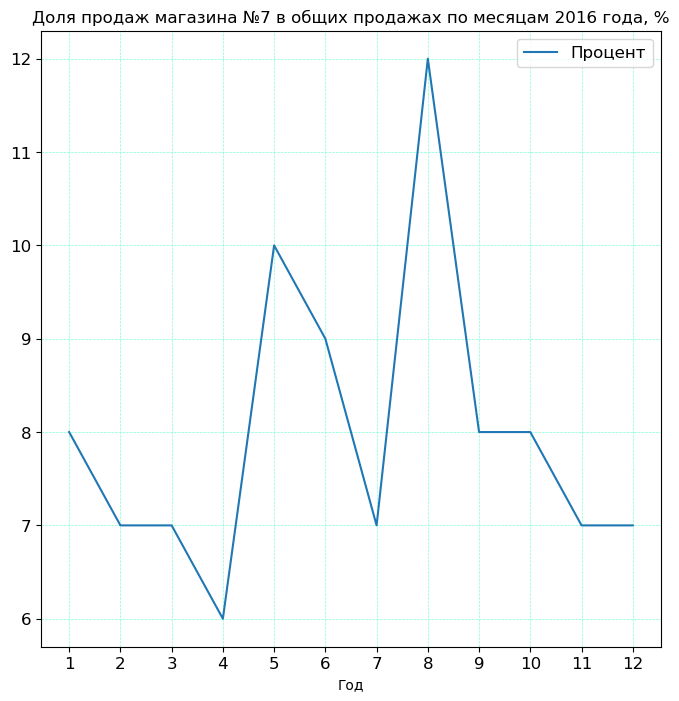

,Дата продажи,Процент
0,1,8.0
1,2,7.0
2,3,7.0
3,4,6.0
4,5,10.0
5,6,9.0
6,7,7.0
7,8,12.0
8,9,8.0
9,10,8.0


In [50]:
def sales_seventh_shop_share_by_month(df, shop_number, year):
    
    start_date = year + '-01-01'
    end_date = year + '-12-31'
    
    df = df.loc[(df['Дата продажи'] >= start_date)
                     & (df['Дата продажи'] < end_date)]
    
    shop = df[(df['Магазин'] == shop_number)]
    
    
    shop_sales_by_year = shop.groupby(shop['Дата продажи'].dt.month)['Сумма всего'].sum().dropna()
    shop_sales_by_year = shop_sales_by_year.to_frame().reset_index()
    shop_sales_by_year.rename(columns = {'Сумма всего': f'Сумма всего магазина №{shop_number}'}, inplace = True)
    col_one_list = shop_sales_by_year['Дата продажи'].tolist()
    
    shops_sales_by_year = df.groupby(df['Дата продажи'].dt.month)['Сумма всего'].sum().dropna()
    shops_sales_by_year = shops_sales_by_year.to_frame().reset_index()
    
    df_out = pd.merge(shop_sales_by_year, shops_sales_by_year, on = 'Дата продажи')
    df_out['Процент'] = (df_out[f'Сумма всего магазина №{shop_number}'] / df_out['Сумма всего'] * 100).round(0)
    df_out = df_out[['Дата продажи', 'Процент']]
    
    df_out.plot.line(figsize = (8, 8), fontsize = 12, x = 'Дата продажи', xticks = col_one_list)
    plt.title(f'Доля продаж магазина №{shop_number} в общих продажах по месяцам {year} года, %')
    plt.xlabel('Год')

    plt.grid(color = 'aquamarine', linestyle = '--', linewidth = 0.5)
    plt.legend(fontsize=12, bbox_to_anchor = (1.0, 1.0))

    
    plt.show()
    
    return df_out
    
    
m2 = sales_seventh_shop_share_by_month(df_out, '7', '2016')
m2
    

### 7. Топ клиенты и средний чек

#### а. Топ клиенты (за весь период)

In [53]:
def top_clients(df):
    
    clients = df.groupby(['Покупатель'])['Сумма всего'].sum().dropna()
    
    clients = clients.to_frame().reset_index()
    clients = clients.sort_values(by='Сумма всего', ascending = False)
    clients.rename(columns = {'Сумма всего':'Выручка от 1 клиента за весь период', 'Покупатель': 'Топ 20 покупателей'}, inplace = True)
    
    return clients.head(20)
    

clients = top_clients(df_out)
clients

,Топ 20 покупателей,Выручка от 1 клиента за весь период
648,ФИО 573,40816.606790
941,ФИО 909,35631.479905
711,ФИО 642,34577.071876
691,ФИО 623,34512.079222
390,ФИО 293,32037.742556
218,ФИО 1252,31497.364790
304,ФИО 196,31151.159280
468,ФИО 379,28457.618706
306,ФИО 198,28324.931240
204,ФИО 1235,27088.521985


In [54]:
def load_dataset9():
    
    df = pd.read_excel(r"C:\OneDrive\Desktop\Nadir\Power BI\karkop\Бюджетный файл (продажи только по магазинам 1-9).xlsx", sheet_name = 'спрПокупатели')
    
    return df

clients_info = load_dataset9()

#### б. Средний чек в зависимости от характеристик клиента (топ 30 подгрупп определено)

In [55]:
def average_check(df1, df2):
    
    df_tot = pd.merge(df1, df2, on = 'Покупатель')
    
    df_tot = df_tot[['Сумма всего', 'Пол', 'Род занятий', 'Канал привлечения', 'Год рождения']]
    
    grouped_data = df_tot.groupby(['Пол', 'Род занятий', 'Канал привлечения', 'Год рождения'])
    average_check_by_group = grouped_data['Сумма всего'].mean()
    
    average_check_by_group = average_check_by_group.to_frame().reset_index()
    
    average_check_by_group = average_check_by_group.sort_values(by='Сумма всего', ascending = False)
    average_check_by_group.rename(columns = {'Сумма всего':'Средний чек группы'}, inplace = True)
    
    
    return average_check_by_group.head(30)

check = average_check(df_out, clients_info)
check

,Пол,Род занятий,Канал привлечения,Год рождения,Средний чек группы
290,Ж,Студент,Друзья,1962,15181.532000
398,М,Безработный,Случайно,1992,14977.043200
601,М,Самозанятый,Случайно,1980,9501.144576
277,Ж,Самозанятый,Случайно,1963,7928.987616
47,Ж,Безработный,Случайно,1990,7532.596880
86,Ж,Госслужащий,Радио,1981,7293.790000
348,Ж,Студент,Радио,1964,6053.845700
366,М,Безработный,Друзья,1984,5720.217840
295,Ж,Студент,Друзья,1973,5329.040640
590,М,Самозанятый,Радио,1979,5284.012800
